<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/ALL_COMPUTATIONAL_SUBSTRATES_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:

## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks


In [31]:
%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [33]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
#%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap



## Substrates combined, xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#1>All features</a></li>
    <li><a href=#2>Feature subsets</a></li>
 </ol>


## All features<a name='1'>
<a href=#outline>Home</a>

In [34]:
## Read in the data 
import pandas as pd 

In [35]:
#WT entry in NEIL1
data_neil_comp=pd.read_csv("../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#normalize numerical features relative to wt 
wt=data_neil_comp.iloc[459]


In [36]:
cols_for_ratio=[
    'editing_value',
    'free_energy',
    'sim_nor_score',
    'probability_active_conf',
    'all_stem_length',
    'site_length',
    'site_length_internal_es',
    'site_length_internal_ecs',
    'u_count',
    'u_all_stem_length',
    'u_hairpin_length',
    'u1_distance',
    'u1_length',
    'u1_length_stem',
    'u2_distance',
    'u2_length',
    'u2_length_hairpin',
    'u3_distance',
    'u3_length',
    'u3_length_bulge',
    'd_count',
    'd_all_stem_length',
    'd1_distance',
    'd1_length',
    'd1_length_stem',
    'd2_distance',
    'd2_length',
    'd2_length_internal_es',
    'd2_length_internal_ecs',
    'd3_distance',
    'd3_length',
    'd3_length_stem']


In [37]:
data_neil_comp[cols_for_ratio]=data_neil_comp[cols_for_ratio]/wt[cols_for_ratio]
data_neil_comp[cols_for_ratio]=data_neil_comp[cols_for_ratio].astype('float')

In [38]:
#remove any null editing level values 
data_neil_comp=data_neil_comp[~data_neil_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_neil_comp=format_for_xgboost(data_neil_comp)
train_split2,eval_split2,test_split2=split_train_test_eval_by_mut_pos(data_neil_comp[~data_neil_comp['mut_pos'].isna()])
null_mut_pos=data_neil_comp[data_neil_comp['mut_pos'].isna()]
train_split2=pd.concat((train_split2,null_mut_pos),axis=0)

train_split2['dataset']="NEIL1_COMP"
eval_split2['dataset']="NEIL1_COMP"
test_split2['dataset']="NEIL1_COMP"

(428, 219)
{20.0: 3, 21.0: 3, 22.0: 3, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 20, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 19, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 20, 57.0: 15, 58.0: 31}


In [40]:
data_ttyh2_comp=pd.read_csv("../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)


In [41]:
wt=data_ttyh2_comp.iloc[0]
cols_for_ratio=[
    'editing_value',
    'free_energy',
    'sim_nor_score',
    'probability_active_conf',
    'all_stem_length',
    'site_length',
    'site_length_internal_es',
    'site_length_internal_ecs',
    'u_count',
    'u_all_stem_length',
    'u_hairpin_length',
    'u1_distance',
    'u1_length',
    'u1_length_stem',
    'u2_distance',
    'u2_length',
    'u2_length_stem',
    'u3_distance',
    'u3_length',
    'u3_length_hairpin',
    'd_count',
    'd_all_stem_length',
    'd1_distance',
    'd1_length',
    'd1_length_stem',
    'd2_distance',
    'd2_length',
    'd2_length_bulge',
    'd3_distance',
    'd3_length',
    'd3_length_stem']
data_ttyh2_comp[cols_for_ratio]=data_ttyh2_comp[cols_for_ratio]/wt[cols_for_ratio]
data_ttyh2_comp[cols_for_ratio]=data_ttyh2_comp[cols_for_ratio].astype('float')

In [42]:
#remove any null editing level values 
data_ttyh2_comp=data_ttyh2_comp[~data_ttyh2_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ttyh2_comp=format_for_xgboost(data_ttyh2_comp)
train_split4,eval_split4,test_split4=split_train_test_eval_by_mut_pos(data_ttyh2_comp[~data_ttyh2_comp['mut_pos'].isna()])
null_mut_pos=data_ttyh2_comp[data_ttyh2_comp['mut_pos'].isna()]
train_split4=pd.concat((train_split4,null_mut_pos),axis=0)

train_split4['dataset']="TTYH2_COMP"
eval_split4['dataset']="TTYH2_COMP"
test_split4['dataset']="TTYH2_COMP"



(601, 216)
{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


In [43]:
data_ajuba=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)


In [44]:
wt=data_ajuba.iloc[0]
cols_for_ratio=[
    'editing_value',
    'free_energy',
    'sim_nor_score',
    'probability_active_conf',
    'all_stem_length',
    'site_length',
    'site_length_internal_es',
    'site_length_internal_ecs',
    'u_count',
    'u_all_stem_length',
    'u_hairpin_length',
    'u1_distance',
    'u1_length',
    'u1_length_stem',
    'u2_distance',
    'u2_length',
    'u2_length_stem',
    'u3_distance',
    'u3_length',
    'u3_length_hairpin',
    'd_count',
    'd_all_stem_length',
    'd1_distance',
    'd1_length',
    'd1_length_stem',
    'd2_distance',
    'd2_length',
    'd2_length_internal_es',
    'd2_length_internal_ecs',
    'd3_distance',
    'd3_length',
    'd3_length_stem']

data_ajuba[cols_for_ratio]=data_ajuba[cols_for_ratio]/wt[cols_for_ratio]
data_ajuba[cols_for_ratio]=data_ajuba[cols_for_ratio].astype('float')

In [45]:
#remove any null editing level values 
data_ajuba=data_ajuba[~data_ajuba["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ajuba=format_for_xgboost(data_ajuba)
train_split5,eval_split5,test_split5=split_train_test_eval_by_mut_pos(data_ajuba[~data_ajuba['mut_pos'].isna()])
null_mut_pos=data_ajuba[data_ajuba['mut_pos'].isna()]
train_split5=pd.concat((train_split5,null_mut_pos),axis=0)

train_split5['dataset']="AJUBA"
eval_split5['dataset']="AJUBA"
test_split5['dataset']="AJUBA"


(482, 186)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 44}


In [46]:
train_split=pd.concat([train_split2,train_split4,train_split5])
eval_split=pd.concat([eval_split2,eval_split4,eval_split5])
test_split=pd.concat([test_split2,test_split4,test_split5])

train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [47]:
train_dataset=train_split['dataset']
eval_dataset=eval_split['dataset']
test_dataset=test_split['dataset']

In [48]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [49]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [50]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append('dataset')
print("\n".join(to_drop))

u2_length_internal_es
u2_exist
d3_3prm_cp_bulge
u1_length_hairpin
u2_3prm_cp_internal
u1_length_internal_es
u1_3prm_cp_internal
u3_length_internal_ecs
u1_exist
mut_type:wt
mut_same_as_site
mut_type:indel
d2_3prm_cp_bulge
mut_type:mismatch
d3_length_hairpin
u1_length_internal_ecs
d1_5prm_cp_bulge
d2_length_hairpin
u1_5prm_cp_internal
d2_5prm_cp_bulge
u3_5prm_cp_internal
d3_5prm_cp_bulge
u2_5prm_cp_internal
d1_exist
site_5prm_cp_hairpin
d3_length_bulge
d2_exist
d1_5prm_cp_hairpin
mut_exist
u3_3prm_cp_internal
u1_5prm_cp_hairpin
d1_3prm_cp_bulge
d1_length_hairpin
u3_length_internal_es
u2_length_internal_ecs
d3_5prm_cp_hairpin
d2_5prm_cp_hairpin
dataset


In [51]:
#remove teh features that don't change across isoforms , or are null for all isoforms
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [53]:
train_split

all_stem_length  d1_3prm_cp_bulge:C:G  d1_3prm_cp_bulge:G:C  \
0           0.966667                   NaN                   NaN   
1           1.000000                   NaN                   NaN   
2           1.000000                   NaN                   NaN   
3           0.966667                   NaN                   NaN   
4           1.033333                   NaN                   NaN   
5           1.033333                   NaN                   NaN   
6           1.000000                   NaN                   NaN   
7           0.966667                   NaN                   NaN   
8           0.833333                   NaN                   NaN   
9           1.000000                   NaN                   NaN   
10          0.966667                   NaN                   NaN   
11          0.966667                   NaN                   NaN   
12          1.000000                   NaN                   NaN   
13          0.966667                   NaN                   NaN   
14          0.900000                   NaN                   NaN   
15          1.000000                   NaN                   NaN   
16          1.000000                   NaN                   NaN   
17          0.966667                   NaN                   NaN   
18          0.966667                   NaN                   NaN   
19          0.966667                   NaN                   NaN   
20          1.000000                   NaN                   NaN   
21          0.966667                   NaN                   NaN   
22          0.966667                   NaN                   NaN   
23          1.000000                   NaN                   NaN   
24          1.000000                   NaN                   NaN   
25          0.900000                   NaN                   NaN   
26          1.033333                   NaN                   NaN   
27          1.033333                   NaN                   NaN   
28          0.966667                   NaN                   NaN   
29          0.966667                   NaN                   NaN   
..               ...                   ...                   ...   
937         0.977273                   NaN                   NaN   
938         0.977273                   NaN                   NaN   
939         0.977273                   NaN                   NaN   
940         0.977273                   NaN                   NaN   
941         0.977273                   NaN                   NaN   
942         0.977273                   NaN                   NaN   
943         0.977273                   NaN                   NaN   
944         0.977273                   NaN                   NaN   
945         0.977273                   NaN                   NaN   
946         0.909091                   NaN                   NaN   
947         0.909091                   NaN                   NaN   
948         0.909091                   NaN                   NaN   
949         0.977273                   NaN                   NaN   
950         0.977273                   NaN                   NaN   
951         0.977273                   NaN                   NaN   
952         0.977273                   NaN                   NaN   
953         0.977273                   NaN                   NaN   
954         1.000000                   NaN                   NaN   
955         1.000000                   NaN                   NaN   
956         1.000000                   NaN                   NaN   
957         1.000000                   NaN                   NaN   
958         1.000000                   NaN                   NaN   
959         1.000000                   NaN                   NaN   
960         0.954545                   NaN                   NaN   
961         1.000000                   NaN                   NaN   
962         1.045455                   NaN                   NaN   
963         1.000000                   NaN                   

In [54]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [55]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(967, 235)
(967,)
(223, 235)
(223,)
(265, 235)
(265,)


In [56]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [72]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['rmse']#['aucpr','auc','mae','map','rmse']

In [73]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [74]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-rmse:0.319021	train-rmse:0.313822
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.249099	train-rmse:0.24574
[2]	eval-rmse:0.209431	train-rmse:0.199569
[3]	eval-rmse:0.183084	train-rmse:0.16765
[4]	eval-rmse:0.17011	train-rmse:0.146285
[5]	eval-rmse:0.160081	train-rmse:0.130901
[6]	eval-rmse:0.15721	train-rmse:0.119144
[7]	eval-rmse:0.153203	train-rmse:0.111497
[8]	eval-rmse:0.147749	train-rmse:0.10463
[9]	eval-rmse:0.148645	train-rmse:0.098312
[10]	eval-rmse:0.147157	train-rmse:0.093781
[11]	eval-rmse:0.147126	train-rmse:0.086607
[12]	eval-rmse:0.147036	train-rmse:0.083428
[13]	eval-rmse:0.145738	train-rmse:0.079219
[14]	eval-rmse:0.145607	train-rmse:0.077262
[15]	eval-rmse:0.145589	train-rmse:0.076699
[16]	eval-rmse:0.143005	train-rmse:0.07407
[17]	eval-rmse:0.143082	train-rmse:0.07135
[18]	eval-rmse:0.142582	train-rmse:0.07054
[19]	eval-rmse:0.144099	train-rmse:0.

[183]	eval-rmse:0.130409	train-rmse:0.006389
[184]	eval-rmse:0.130423	train-rmse:0.006331
[185]	eval-rmse:0.1304	train-rmse:0.006252
[186]	eval-rmse:0.130396	train-rmse:0.006198
[187]	eval-rmse:0.130422	train-rmse:0.006183
[188]	eval-rmse:0.130424	train-rmse:0.006151
[189]	eval-rmse:0.130414	train-rmse:0.006146
[190]	eval-rmse:0.130403	train-rmse:0.006125
[191]	eval-rmse:0.130422	train-rmse:0.006022
[192]	eval-rmse:0.130432	train-rmse:0.005993
[193]	eval-rmse:0.13043	train-rmse:0.005972
[194]	eval-rmse:0.130439	train-rmse:0.005917
[195]	eval-rmse:0.130363	train-rmse:0.00588
[196]	eval-rmse:0.130358	train-rmse:0.005852
[197]	eval-rmse:0.130354	train-rmse:0.00584
[198]	eval-rmse:0.130349	train-rmse:0.005838
[199]	eval-rmse:0.13036	train-rmse:0.005797
[200]	eval-rmse:0.130336	train-rmse:0.005772
[201]	eval-rmse:0.130268	train-rmse:0.005746
[202]	eval-rmse:0.130266	train-rmse:0.005719
[203]	eval-rmse:0.130265	train-rmse:0.005696
[204]	eval-rmse:0.130258	train-rmse:0.005668
[205]	eval-rmse:

In [75]:
# save to binary file for faster loading
bst.save_model('ratio.combined.substrates.model')
# save model to text file 
bst.dump_model('ratio.combined.substrates.txt')


In [76]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [77]:
## get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred)

Train
	Spearman corr : SpearmanrResult(correlation=0.9996785071749787, pvalue=0.0)
	Pearson corr : (0.9999229160526345, 0.0)
	MAE : 0.0017370863100446723
	MAPE : 0.019136863254964696
	RMSE : 0.004719464219651202
	auPRC : 0.9999999999999999
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9118265283683739, pvalue=2.1322901586824035e-87)
	Pearson corr : (0.9417303152636205, 1.518334684321874e-106)
	MAE : 0.0768602712064887
	MAPE : 0.5734196162454708
	RMSE : 0.13011236875737345
	auPRC : 0.9511752430244736
	auROC : 0.9886075949367088
Test
	Spearman corr : SpearmanrResult(correlation=0.9181255478058316, pvalue=1.0131820008665557e-107)
	Pearson corr : (0.9174173733263516, 2.9976310587145176e-107)
	MAE : 0.09434887934297101
	MAPE : 0.5675231257843769
	RMSE : 0.15748189880162097
	auPRC : 0.9642128238862981
	auROC : 0.9791024653312789


In [78]:
## get performance on Neil1 subset 
from helpers import * 
cur_split="NEIL1_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.5)

Train
	Spearman corr : SpearmanrResult(correlation=0.9993646275905331, pvalue=0.0)
	Pearson corr : (0.9997690366785933, 0.0)
	MAE : 0.0025256132920148692
	MAPE : 0.016234714399233494
	RMSE : 0.007986974357510095
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.8332703802824166, pvalue=2.4183673892100156e-17)
	Pearson corr : (0.9112002503918359, 3.5717436510914e-25)
	MAE : 0.08234684180379623
	MAPE : 0.9902987188226433
	RMSE : 0.13281277911225456
	auPRC : 0.9167598605098607
	auROC : 0.9970845481049563
Test
	Spearman corr : SpearmanrResult(correlation=0.9051839671199676, pvalue=2.4160821960704125e-27)
	Pearson corr : (0.8950698170747626, 6.709872453371415e-26)
	MAE : 0.10338664214375994
	MAPE : 0.5171554199128501
	RMSE : 0.15662289223331718
	auPRC : 0.9703572994245391
	auROC : 0.9782051282051283


In [79]:
## get performance on TTYH2 subset 
from helpers import * 
cur_split="TTYH2_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9998646619507671, pvalue=0.0)
	Pearson corr : (0.9999790854160655, 0.0)
	MAE : 0.0014901422216834494
	MAPE : 0.013936561064528011
	RMSE : 0.002692581424627867
	auPRC : 0.9999999999999999
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9443259962024407, pvalue=2.9329645981714936e-44)
	Pearson corr : (0.9291750939117841, 8.397378754797442e-40)
	MAE : 0.09844238497411525
	MAPE : 0.28166691722149195
	RMSE : 0.160525869259592
	auPRC : 0.995203854623163
	auROC : 0.9879807692307693
Test
	Spearman corr : SpearmanrResult(correlation=0.9194535376175987, pvalue=1.4970082769660162e-43)
	Pearson corr : (0.8971377391409495, 2.4767936843304927e-38)
	MAE : 0.11970999811506701
	MAPE : 0.41553412908217985
	RMSE : 0.1927537609065049
	auPRC : 0.9979187872580411
	auROC : 0.9941016333938295


In [80]:
## get performance on AJUBA subset 
from helpers import * 
cur_split="AJUBA"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9981837624940567, pvalue=0.0)
	Pearson corr : (0.9999443195535698, 0.0)
	MAE : 0.001327132174816898
	MAPE : 0.02852063279577103
	RMSE : 0.0018146827817351859
	auPRC : 0.9994438264738599
	auROC : 0.9996272134203169
Eval
	Spearman corr : SpearmanrResult(correlation=0.7723768854138612, pvalue=4.8800111697999086e-15)
	Pearson corr : (0.8523657253117884, 8.05806868513613e-21)
	MAE : 0.04417392568196343
	MAPE : 0.5733390369568452
	RMSE : 0.07018101824750111
	auPRC : 0.8823254918804021
	auROC : 0.8856209150326797
Test
	Spearman corr : SpearmanrResult(correlation=0.730158064540248, pvalue=4.713381008368195e-16)
	Pearson corr : (0.8432688476392942, 3.510508031731083e-25)
	MAE : 0.05721855765840813
	MAPE : 0.7870169659035803
	RMSE : 0.10218358598794508
	auPRC : 0.8773353599218828
	auROC : 0.8551829268292683


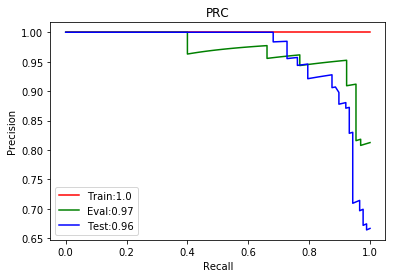

In [81]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

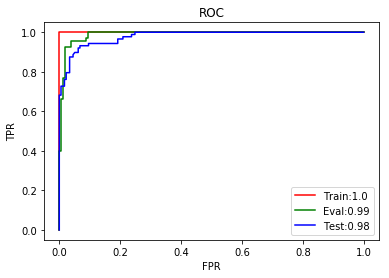

In [82]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

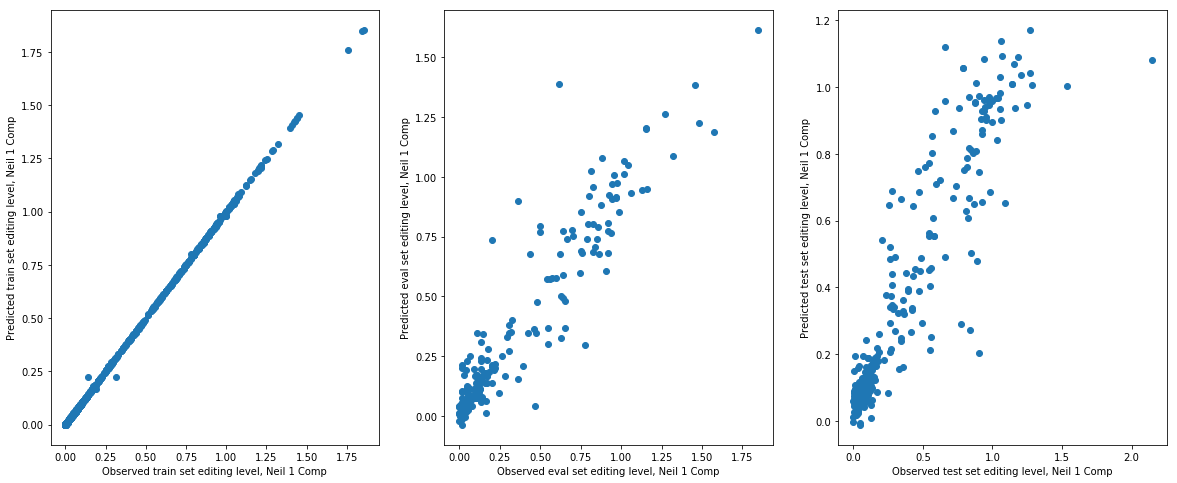

In [83]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Comp")
plt.ylabel("Predicted train set editing level, Neil 1 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Comp")
plt.ylabel("Predicted eval set editing level, Neil 1 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Comp")
plt.ylabel("Predicted test set editing level, Neil 1 Comp")

plt.show()

In [84]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':test_y,
                     'Predicted':test_pred,
                     'Dataset':test_dataset})

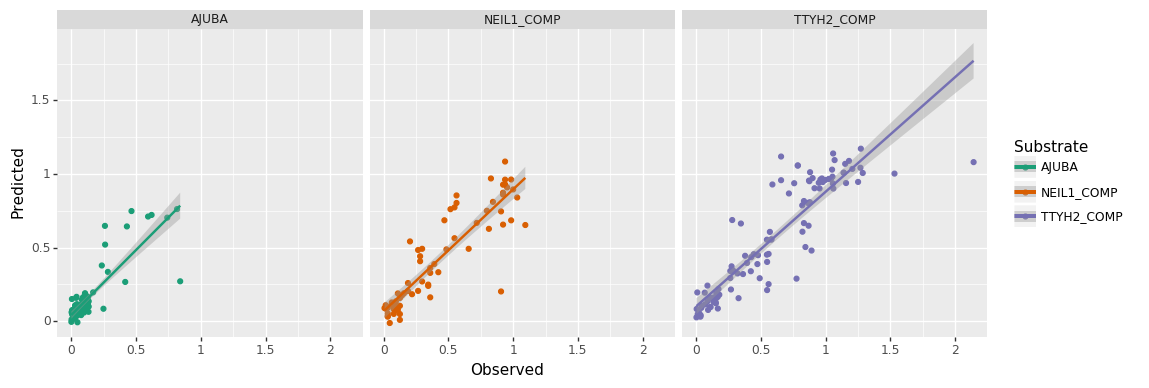

<ggplot: (-9223363282122997546)>


/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning:

Saving 12 x 4 in image.

/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning:

Filename: all.comp.substrates.svg



In [85]:
plotnine.options.figure_size = (12, 4)

p=(ggplot(test_df, aes('Observed', 'Predicted', color='factor(Dataset)'))
 + geom_point()
 + stat_smooth(method='lm')
 + scale_color_manual(values=['#1b9e77','#d95f02','#7570b3'],name="Substrate")
 + facet_wrap('~Dataset'))
print(p)
ggsave(plot=p, filename='all.comp.substrates.svg',width=12,height=4,units='in')


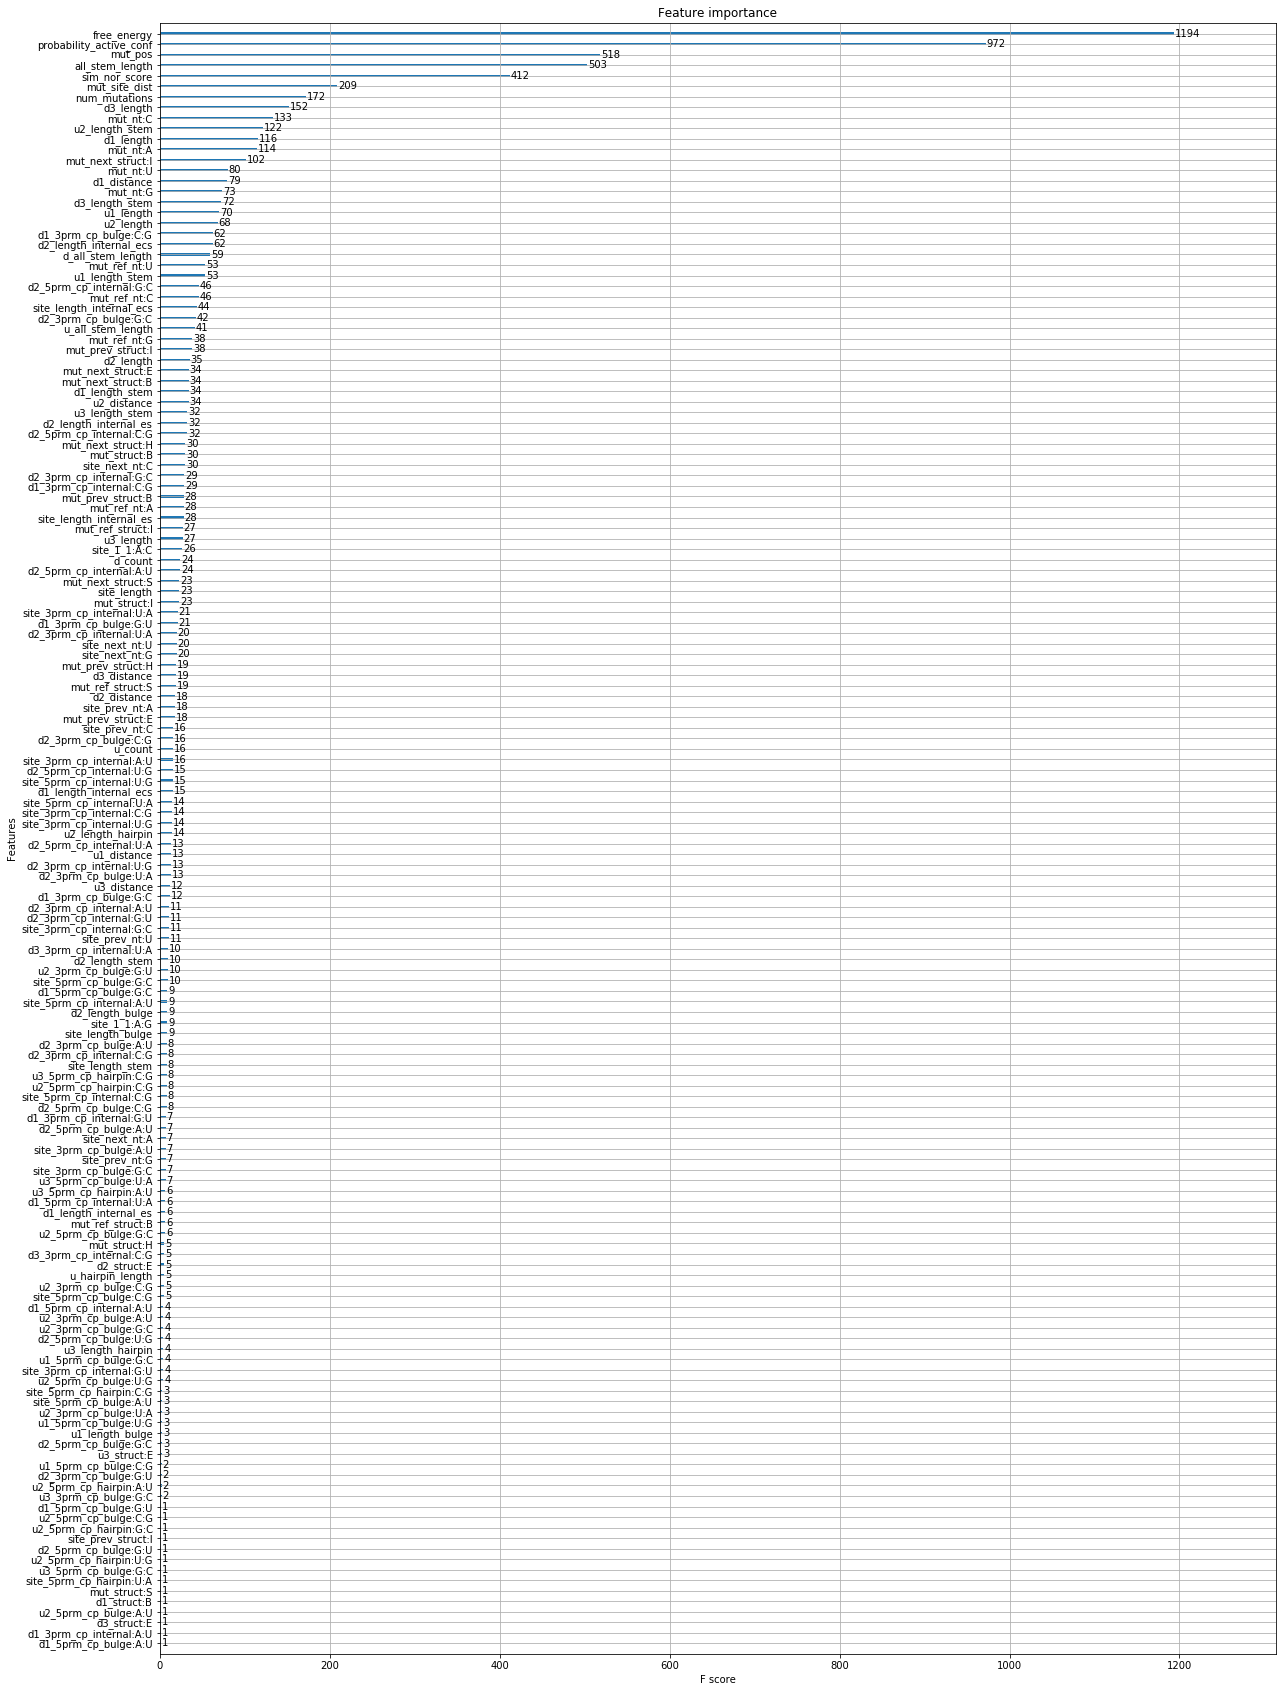

In [86]:
matplotlib.rcParams['figure.figsize'] = [20, 30]
xgboost.plot_importance(bst)

In [87]:
#xgboost.to_graphviz(bst, num_trees=2)


In [88]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)

#concatenate train, test, validate 
data_x=pd.concat([train_X,eval_X,test_X])
data_y=pd.concat([train_y,eval_y,test_y])
data_names=pd.concat([train_dataset,eval_dataset,test_dataset])
data_x.reset_index(inplace=True, drop=True) 
data_y.reset_index(inplace=True,drop=True)
data_names.reset_index(inplace=True,drop=True)



In [89]:
data_x_neil1=data_x[data_names=="NEIL1_COMP"]
data_y_neil1=data_y[data_names=="NEIL1_COMP"]
data_x_neil1.reset_index(inplace=True, drop=True) 
data_y_neil1.reset_index(inplace=True,drop=True)

data_x_ttyh2=data_x[data_names=="TTYH2_COMP"]
data_y_ttyh2=data_y[data_names=="TTYH2_COMP"]
data_x_ttyh2.reset_index(inplace=True, drop=True) 
data_y_ttyh2.reset_index(inplace=True,drop=True)

data_x_ajuba=data_x[data_names=="AJUBA"]
data_y_ajuba=data_y[data_names=="AJUBA"]
data_x_ajuba.reset_index(inplace=True, drop=True) 
data_y_ajuba.reset_index(inplace=True,drop=True)


In [90]:
shap_values_neil1 = explainer.shap_values(data_x_neil1)
shap_values_ttyh2 = explainer.shap_values(data_x_ttyh2)
shap_values_ajuba = explainer.shap_values(data_x_ajuba)
shap_values = explainer.shap_values(test_X)


In [91]:
max(data_y_neil1)

1.421875

In [92]:
min(data_y_neil1)


0.0

In [93]:
max(data_y_ttyh2)

2.1437908496732025

In [94]:
min(data_y_ttyh2)

0.0

In [95]:
max(data_y_ajuba)

1.2065527065527064

In [96]:
min(data_y_ajuba)

0.0

1.421875
0.0


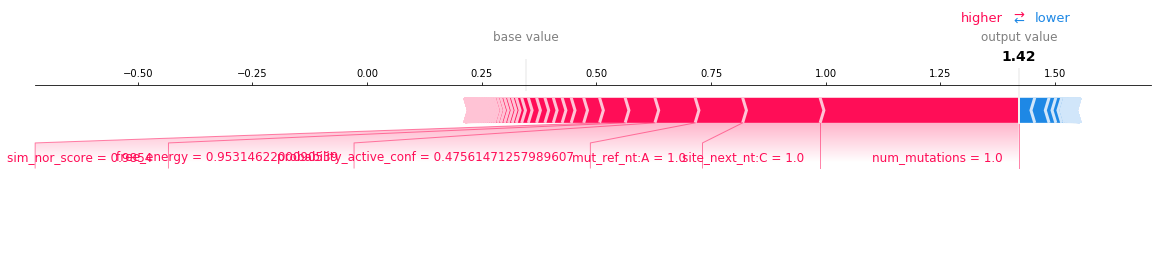

In [97]:
###### Max and min editing level Neil 1
max_index=data_y_neil1.index[data_y_neil1 == max(data_y_neil1)]
min_index=data_y_neil1.index[data_y_neil1 == min(data_y_neil1)]
print(max(data_y_neil1))
print(min(data_y_neil1))
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_neil1[max_index,:], data_x_neil1.iloc[max_index,:],matplotlib=True,show=False)
plt.savefig("neil1.max.forceplot.svg",format='svg',height=1,width=7,bbox_inches="tight",dpi=300)


In [98]:
min_index[0]

221

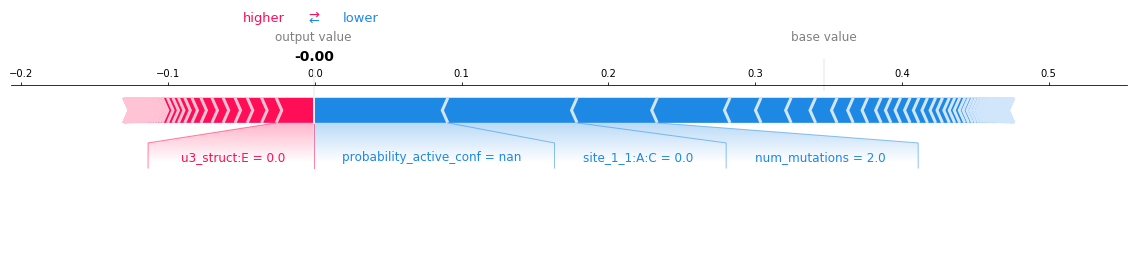

In [99]:
shap.force_plot(explainer.expected_value, shap_values_neil1[min_index[0],:], data_x_neil1.iloc[min_index[0],:],matplotlib=True,show=False)
plt.savefig("neil1.min.forceplot.svg",height=1,width=7,bbox_inches="tight",dpi=300)

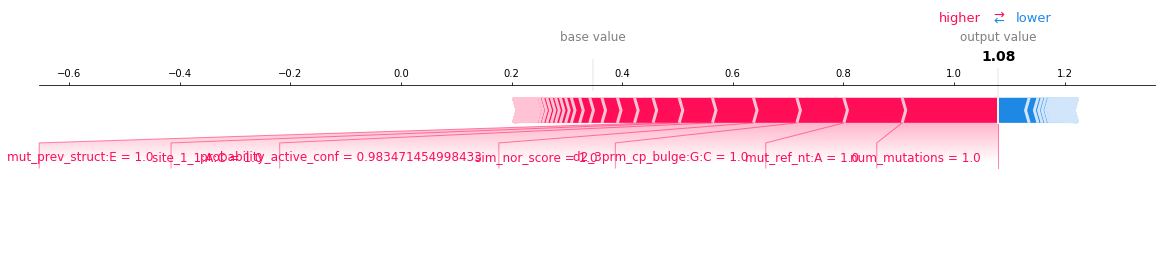

In [100]:
## Max and min editing level TTYH2
max_index=data_y_ttyh2.index[data_y_ttyh2 == max(data_y_ttyh2)]
min_index=data_y_ttyh2.index[data_y_ttyh2 == min(data_y_ttyh2)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ttyh2[max_index,:], data_x_ttyh2.iloc[max_index,:],matplotlib=True,show=False)
plt.savefig("ttyh2.max.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

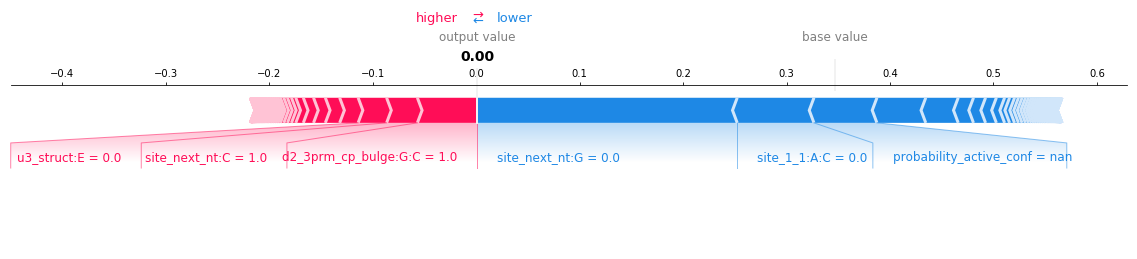

In [101]:
shap.force_plot(explainer.expected_value, shap_values_ttyh2[min_index[0],:], data_x_ttyh2.iloc[min_index[0],:],matplotlib=True,show=False)
plt.savefig("ttyh2.min.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

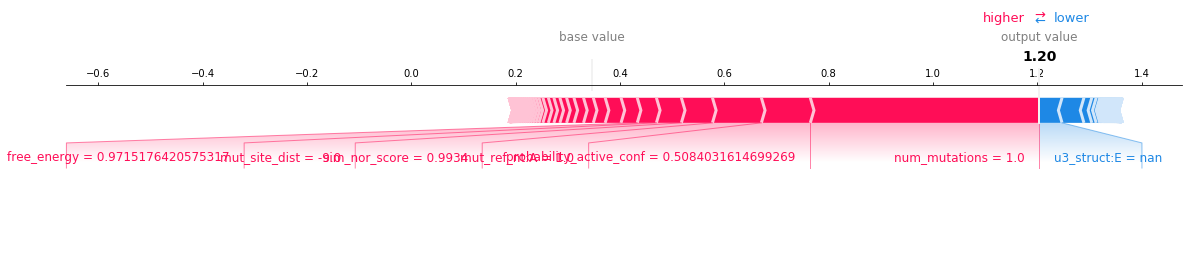

In [102]:
## Max and min editing level AJUBA
max_index=data_y_ajuba.index[data_y_ajuba == max(data_y_ajuba)]
min_index=data_y_ajuba.index[data_y_ajuba == min(data_y_ajuba)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ajuba[max_index,:], data_x_ajuba.iloc[max_index,:],matplotlib=True, show=False)
plt.savefig("ajuba.max.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

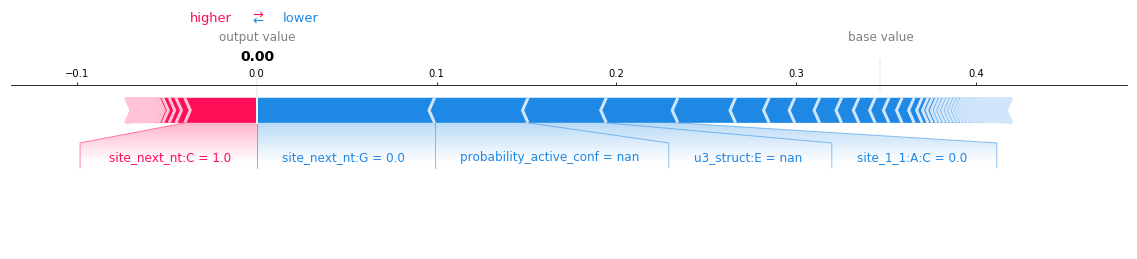

In [103]:
shap.force_plot(explainer.expected_value, shap_values_ajuba[min_index[0],:], data_x_ajuba.iloc[min_index[0],:],matplotlib=True, show=False)
plt.savefig("ajuba.min.forceplot.svg",height=2,width=10,bbox_inches="tight",dpi=300)

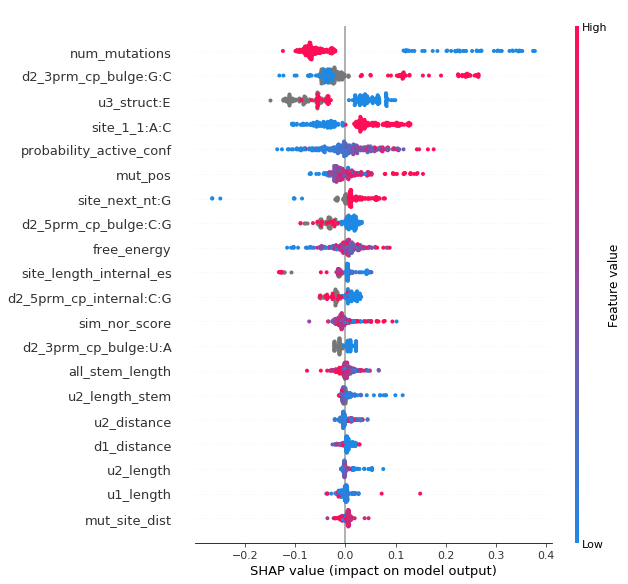

In [104]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X,show=False)
plt.savefig("all.comp.shap.svg", format='svg',width=8,height=10,dpi=300,bbox_inches="tight")

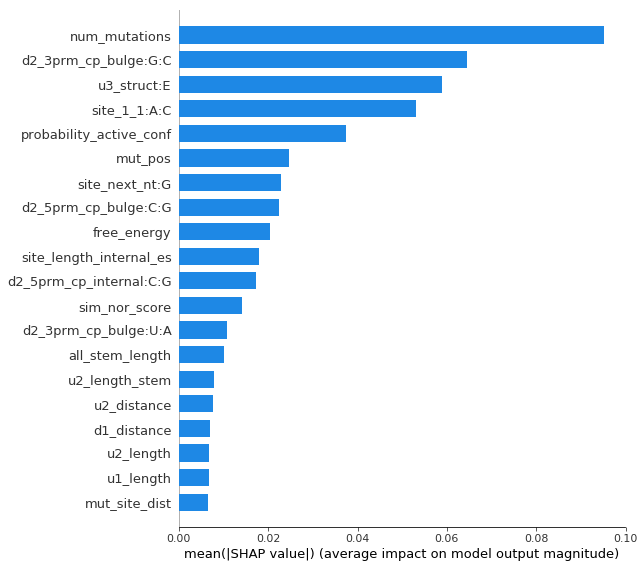

In [105]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, data_x, plot_type="bar")

In [106]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(data_x)
shap_interaction_values.shape

(1455, 235, 235)

In [107]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [108]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [109]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)


## Feature subset<a name='2'>
<a href=#outline>Home</a>

In [110]:
shap_values=pd.DataFrame(shap_values,columns=Cols)

['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*']


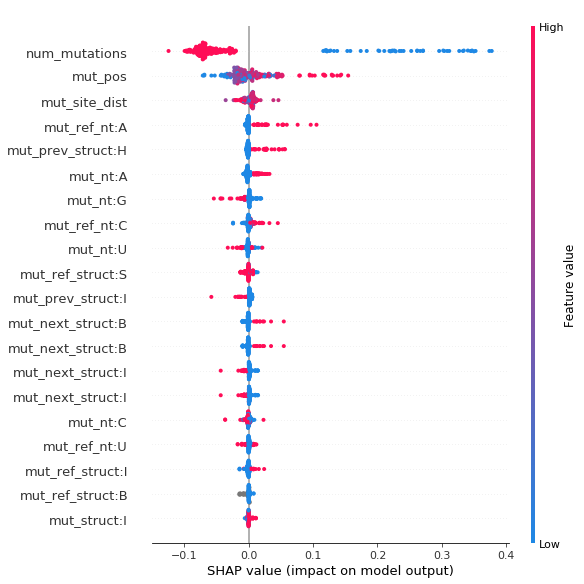

Contribution/Total:0.2591505
['site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


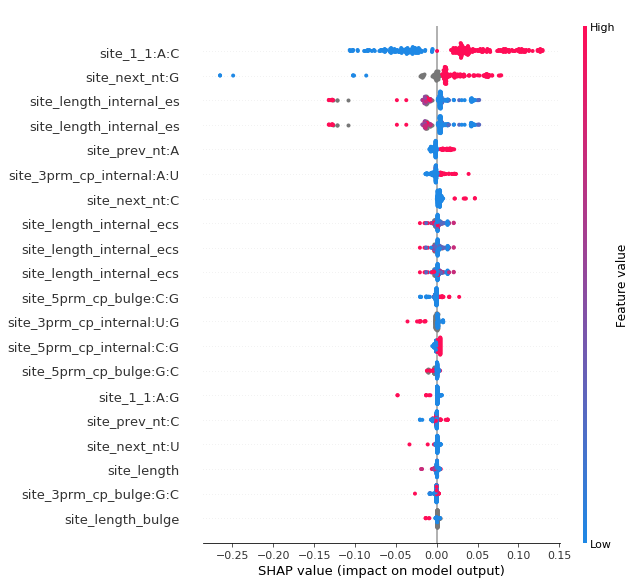

Contribution/Total:0.22600096
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*']


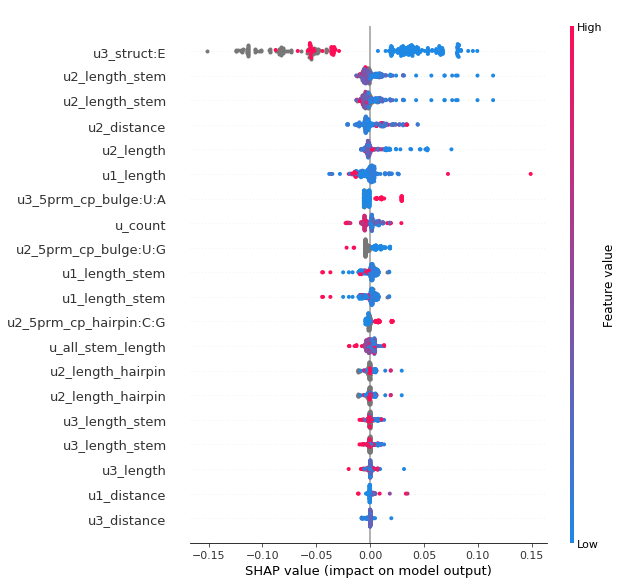

Contribution/Total:0.20635402
['d_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length*', 'd2_length_stem*', 'd2_length_hairpin*', 'd2_length_bulge*', 'd2_length_internal_es*', 'd2_length_internal_ecs*', 'd2_5prm_cp_hairpin*', 'd2_5prm_cp_bulge*', 'd2_3prm_cp_bulge*', 'd2_5prm_cp_internal*', 'd2_3prm_cp_internal*', 'd3_exist*', 'd3_distance*', 'd3_struct*', 'd3_length*', 'd3_length_stem*', 'd3_length_hairpin*', 'd3_length_bulge*', 'd3_length_internal_es*', 'd3_length_internal_ecs*', 'd3_5prm_cp_hairpin*', 'd3_5prm_cp_bulge*', 'd3_3prm_cp_bulge*', 'd3_5prm_cp_internal*', 'd3_3prm_cp_internal*']


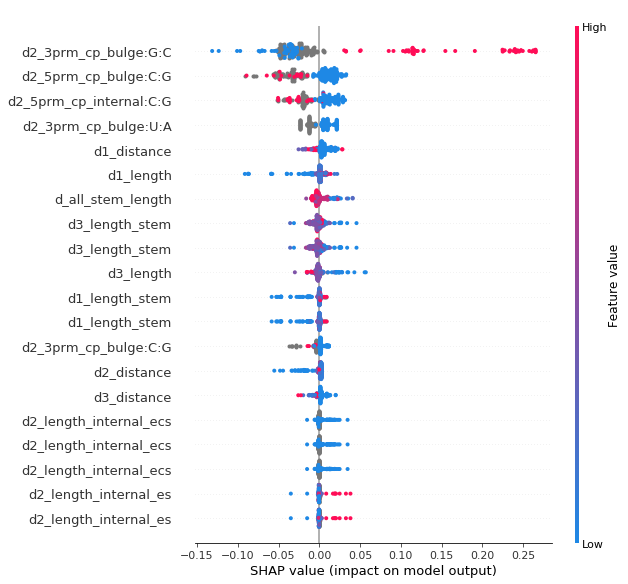

Contribution/Total:0.28710228
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*',

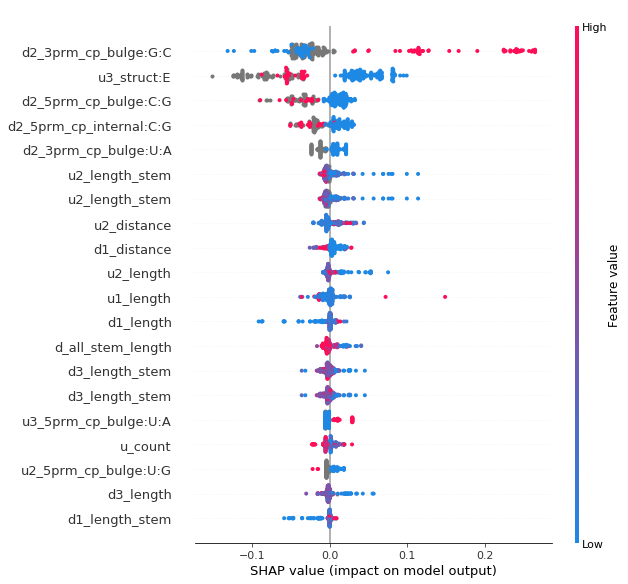

Contribution/Total:0.49345633
['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


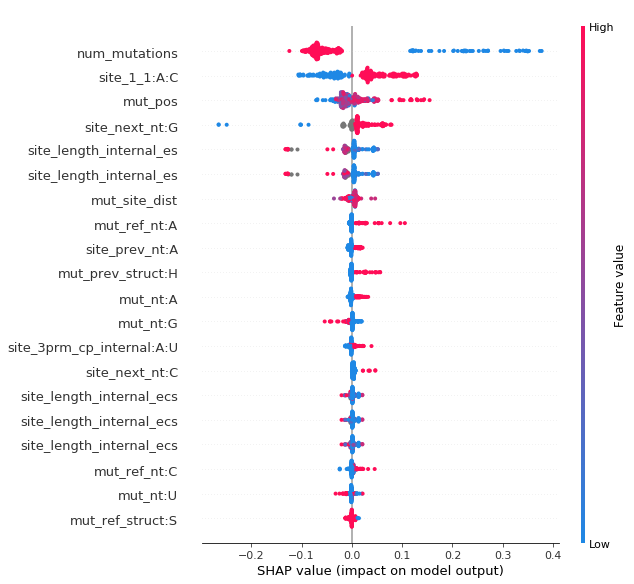

Contribution/Total:0.4851515
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_s

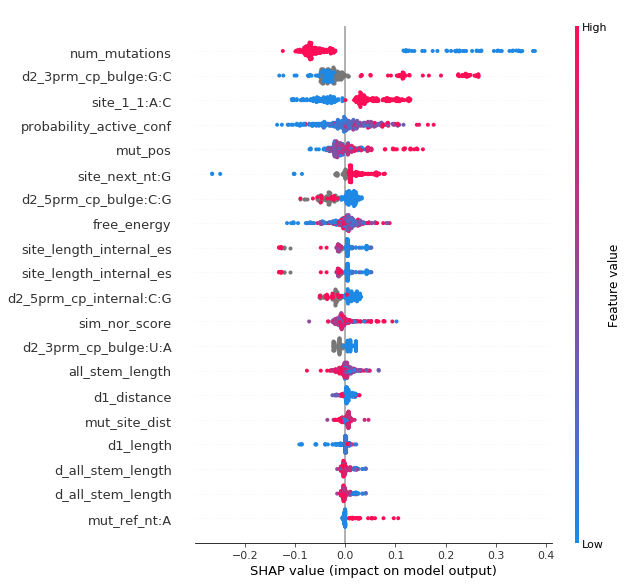

Contribution/Total:0.9044552
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 

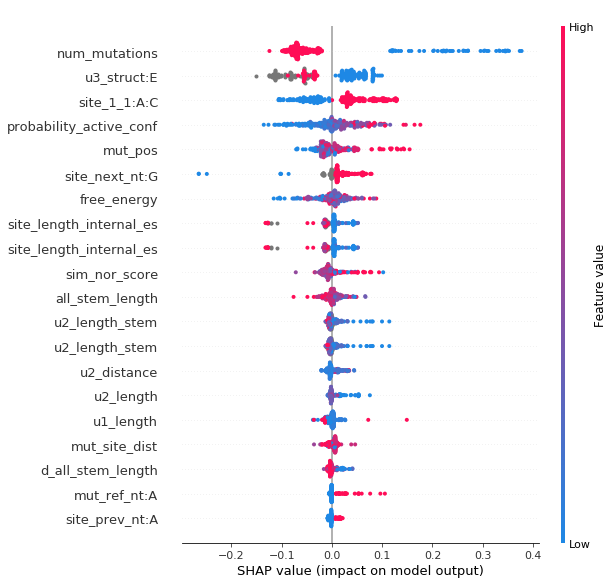

Contribution/Total:0.823707
['site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


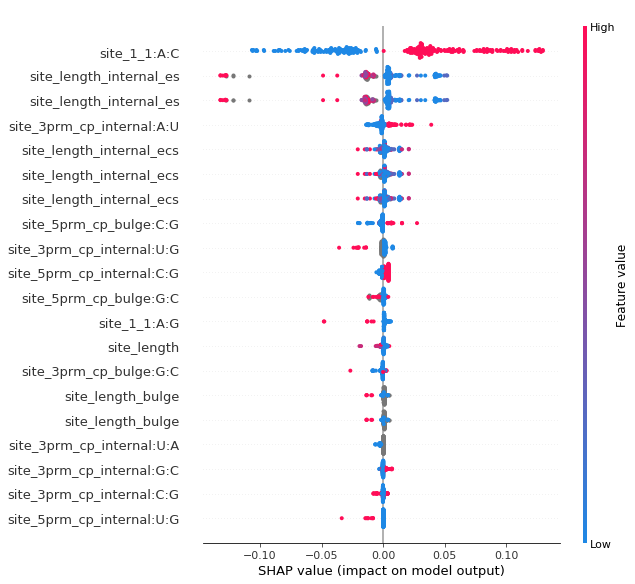

Contribution/Total:0.1745421
['site_prev_nt*', 'site_next_nt*']


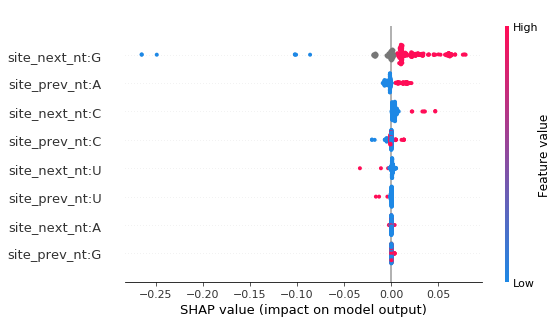

Contribution/Total:0.051458865
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*']


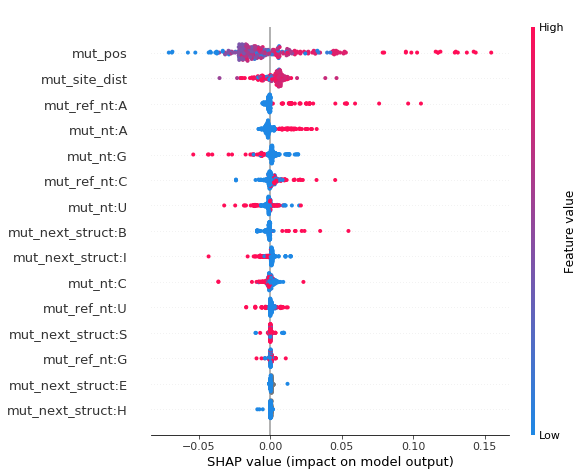

Contribution/Total:0.090352
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'site_prev_nt*', 'site_next_nt*']


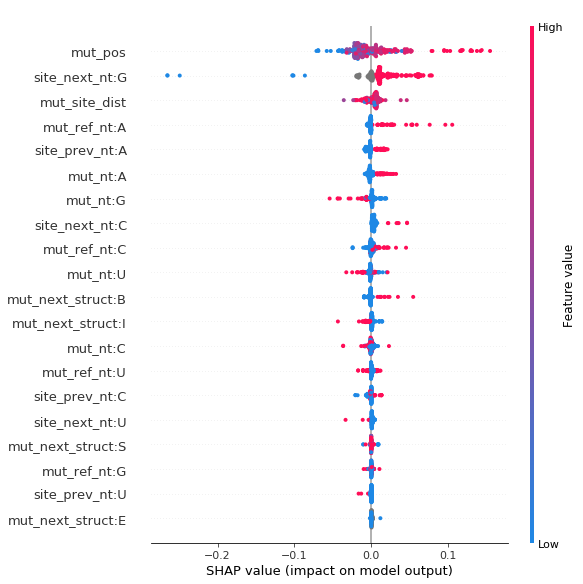

Contribution/Total:0.14181086
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_c

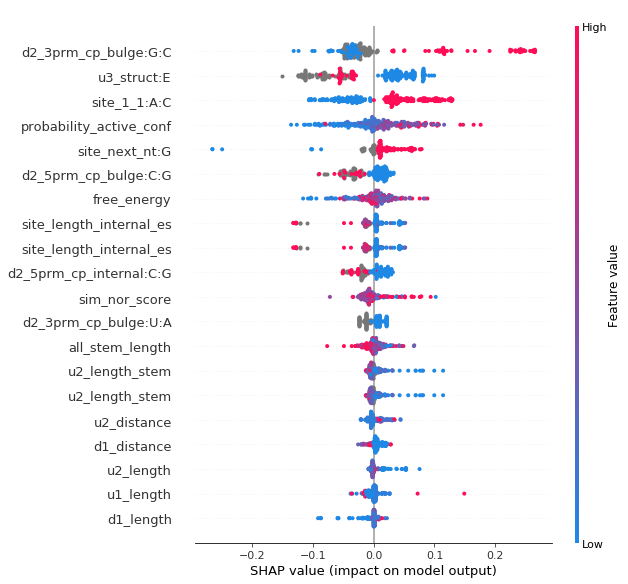

Contribution/Total:0.85165876
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*']


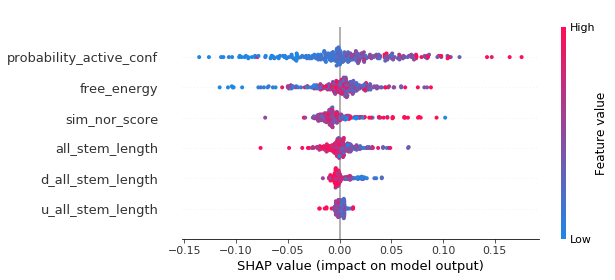

Contribution/Total:0.13220145


In [111]:
from feature_subsets import * 
subset_names=["mut","site","u","d","u_d","mut_site","no_up","no_down","site_struct","site_seq","mut_seq","mut_seq_site","no_mut","overall_structure"]
subset_contribs=[]
for subset in [mut,site,u,d,u_d,mut_site,no_up,no_down,site_struct,site_seq,mut_seq,mut_seq_site,no_mut,overall_structure]: 
  print(subset)
  cur_features=filter_features(shap_values,subset)
  cur_feature_shap=shap_values[cur_features].values 
  cur_feature_data_X=test_X[cur_features]
  shap.summary_plot(cur_feature_shap, cur_feature_data_X)#,sort=False,max_display=50)
  contrib=shap_contribs_subgroup(shap_values,subset)
  subset_contribs.append(contrib)
  print("Contribution/Total:"+str(contrib))

In [112]:
subset_names
subset_contribs

[0.2591505,
 0.22600096,
 0.20635402,
 0.28710228,
 0.49345633,
 0.4851515,
 0.9044552,
 0.823707,
 0.1745421,
 0.051458865,
 0.090352,
 0.14181086,
 0.85165876,
 0.13220145]

In [113]:
subset_contrib_df=pd.DataFrame({'Subset':subset_names,
                               'Contribution':[100*i for i in subset_contribs]})

In [114]:
subset_contrib_df=subset_contrib_df.sort_values(by=['Contribution'],ascending=False)
subset_contrib_df.reset_index(inplace=True, drop=True) 


In [115]:
subset_contrib_df

Subset  Contribution
0               no_up     90.445518
1              no_mut     85.165876
2             no_down     82.370698
3                 u_d     49.345633
4            mut_site     48.515150
5                   d     28.710228
6                 mut     25.915051
7                site     22.600096
8                   u     20.635402
9         site_struct     17.454210
10       mut_seq_site     14.181086
11  overall_structure     13.220145
12            mut_seq      9.035200
13           site_seq      5.145887

In [116]:
from pandas.api.types import CategoricalDtype
from plotnine.data import mpg

In [117]:
subset_cat = CategoricalDtype(categories=list(subset_contrib_df['Subset']), ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
subset_contrib_df['Subset_Cat'] = subset_contrib_df['Subset'].astype(str).astype(subset_cat)


/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning:

Saving 5 x 4 in image.

/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning:

Filename: all.comp.subset.importance.svg



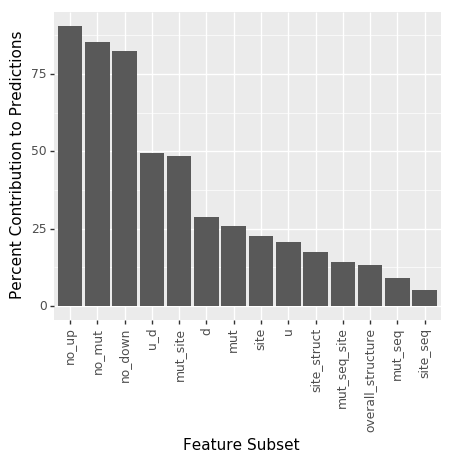

<ggplot: (8754689736617)>

In [118]:
p=(ggplot(subset_contrib_df, aes('Subset_Cat', 'Contribution'))
 + geom_bar(stat='identity')
 + xlab("Feature Subset")
 + theme(axis_text_x=element_text(angle=90))
 + ylab("Percent Contribution to Predictions"))
ggsave(plot=p, filename='all.comp.subset.importance.svg',width=5,height=4,units='in')
p